In [1]:
import zipfile
import numpy as np
import os
import shutil

# Data collect

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
!unzip '/content/drive/MyDrive/kuliah/portofolio/CNN/YogaPoses/archive (8).zip' -d "/content"
from google.colab import output
output.clear()

In [4]:
source = '/content/YogaPoses'#letak filenya
classes = ['Downdog','Goddess','Plank','Tree','Warrior2']

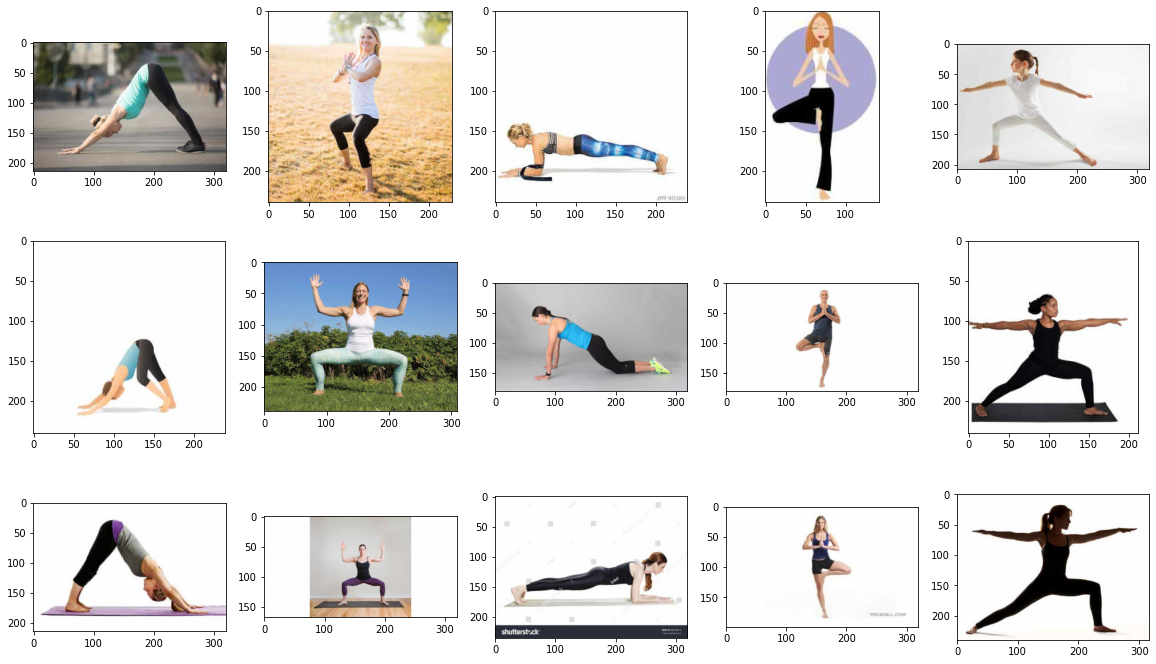

In [5]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

nrows = 3; ncols = 5 # jumlah kolom dan barisnya

# Setup matplotlib dan ukurannya
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index = 3; full_path = []
for categori in classes:
    categori_dir = os.listdir(source + '/' + categori)
    categori_path = [os.path.join(source + '/' + categori, fname) 
                                    for fname in categori_dir[0:pic_index]]
    full_path.append(categori_path)

i=0
for img_path in full_path:
  i = full_path.index(img_path) 
  for path in img_path:
      sp = plt.subplot(nrows, ncols, i + 1)
      i+=5 # agar 1 kategori vertikal
      sp.axis('On') # memperlihatkan dimensi dari gambar
      img = mpimg.imread(path)
      plt.imshow(img)
plt.show()

# Data preprocessing

In [6]:
source = '/content/YogaPoses'#letak filenya
classes = ['Downdog','Goddess','Plank','Tree','Warrior2']

In [7]:
train_ratio = 0.8
for i in classes:
    os.makedirs(source + 'Output/train/' + i)
    os.makedirs(source + 'Output/valid/' + i)
    source_1_yoga = source + '/' + i
    allFileNames = os.listdir(source_1_yoga)#memasukkan seluruh nama file ke dalam list
    np.random.shuffle(allFileNames)#dirandom

    #proses split
    train_FileNames, valid_FileNames = np.split(np.array(allFileNames), [int(len(allFileNames)*(train_ratio))])
    train_FileNames = [source + '/' + i + '/' + name for name in train_FileNames.tolist()]
    valid_FileNames = [source + '/' + i + '/' + name for name in valid_FileNames.tolist()]

    #memasukkan hasil split ke dalam folder train dan valid
    for name in train_FileNames:
      shutil.copy(name, source + 'Output/train/' + i)
    for name in valid_FileNames:
      shutil.copy(name, source + 'Output/valid/' + i)

In [8]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

#proses scaling data sehingga pixel antara 0 - 1
train_datagen = ImageDataGenerator(rescale = 1/255)
valid_datagen = ImageDataGenerator(rescale = 1/255)

train_generator = train_datagen.flow_from_directory(
    source + 'Output/train/', 
    classes = classes,
    target_size =(200, 200),
    batch_size = 32,#semakin kecil semakin bagus dan semakin lama
    class_mode = 'categorical')

valid_generator = valid_datagen.flow_from_directory(
    source + 'Output/valid/',
    classes = classes,
    target_size = (200, 200),
    batch_size = 20,
    class_mode = 'categorical',
    shuffle = False)

Found 788 images belonging to 5 classes.
Found 200 images belonging to 5 classes.


# Build model

In [9]:
import tensorflow as tf
import numpy as np

In [10]:
model = tf.keras.models.Sequential([tf.keras.layers.Conv2D(32, (5, 5), strides=(2, 2),
                                                           activation='relu', padding = 'same',
                                                           input_shape = (200, 200, 3),
                                                           kernel_initializer='he_normal',
                                                           bias_initializer='zeros'),
                                    tf.keras.layers.MaxPool2D(pool_size = (2,2) ),
                                    tf.keras.layers.Conv2D(64, (3, 3), strides=(2, 2),
                                                           activation='relu', padding = 'same',
                                                           kernel_initializer='he_normal',
                                                           bias_initializer='zeros'),
                                    tf.keras.layers.MaxPool2D(pool_size = (2,2)),
                                    tf.keras.layers.Conv2D(64, (3, 3), strides=(2, 2),
                                                           activation='relu', padding = 'same',
                                                           kernel_initializer='he_normal',
                                                           bias_initializer='zeros'),
                                    tf.keras.layers.Flatten(), 
                                    tf.keras.layers.Dense(128, activation=tf.nn.relu), 
                                    tf.keras.layers.Dense(5, activation=tf.nn.softmax)])
'''
download 20 45 20220703
128 hasilnya 70.5
256 67.5
512 hasilnya 67

batch size 64
naikin step train dan kurangi bact size bikin tambah bagus akurasinya 87.5

batch size 32 85.5
batch size 32 epoch 30 88
batch size 32 epoch 30 step 25 89.5

kalau pake batch size 16 step 50 89.5

epoch 15 batch size 16  88.5

epoch 20 batch size 32  88.5 56
epoch 12 batch size 32 loss: 0.5080 - accuracy: 0.9100 loss: 0.5034 - accuracy: 0.8800 loss: 0.5963 - accuracy: 0.8650
epoch 15 batch size 32 loss: 0.5526 - accuracy: 0.8950 loss: 0.6695 - accuracy: 0.8900 loss: 0.7321 - accuracy: 0.8800

hipoku epoch 12 batch size 32 paling bagus 1454 04 juli 2022
'''

'\ndownload 20 45 20220703\n128 hasilnya 70.5\n256 67.5\n512 hasilnya 67\n\nbatch size 64\nnaikin step train dan kurangi bact size bikin tambah bagus akurasinya 87.5\n\nbatch size 32 85.5\nbatch size 32 epoch 30 88\nbatch size 32 epoch 30 step 25 89.5\n\nkalau pake batch size 16 step 50 89.5\n\nepoch 15 batch size 16  88.5\n\nepoch 20 batch size 32  88.5 56\nepoch 12 batch size 32 loss: 0.5080 - accuracy: 0.9100 loss: 0.5034 - accuracy: 0.8800 loss: 0.5963 - accuracy: 0.8650\nepoch 15 batch size 32 loss: 0.5526 - accuracy: 0.8950 loss: 0.6695 - accuracy: 0.8900 loss: 0.7321 - accuracy: 0.8800\n\nhipoku epoch 12 batch size 32 paling bagus 1454 04 juli 2022\n'

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 100, 100, 32)      2432      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 50, 50, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 25, 25, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 12, 12, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 6, 6, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 2304)              0

In [12]:
model.compile(optimizer = tf.optimizers.Adam(),
              loss = 'categorical_crossentropy',
              metrics=['accuracy'])

In [13]:
%%time
history = model.fit(train_generator,
      steps_per_epoch=24,  
      epochs=12,
      verbose=1,
      validation_data = valid_generator,
      validation_steps=10)

Epoch 1/12
24/24 [==============================] - 14s 96ms/step - loss: 1.6619 - accuracy: 0.2474 - val_loss: 1.5219 - val_accuracy: 0.3700
Epoch 2/12
24/24 [==============================] - 2s 85ms/step - loss: 1.2157 - accuracy: 0.5291 - val_loss: 1.1104 - val_accuracy: 0.6000
Epoch 3/12
24/24 [==============================] - 2s 84ms/step - loss: 0.7970 - accuracy: 0.6799 - val_loss: 0.9082 - val_accuracy: 0.6150
Epoch 4/12
24/24 [==============================] - 2s 85ms/step - loss: 0.6221 - accuracy: 0.7540 - val_loss: 0.7419 - val_accuracy: 0.7300
Epoch 5/12
24/24 [==============================] - 2s 87ms/step - loss: 0.4064 - accuracy: 0.8611 - val_loss: 0.6831 - val_accuracy: 0.7650
Epoch 6/12
24/24 [==============================] - 2s 89ms/step - loss: 0.3316 - accuracy: 0.8849 - val_loss: 0.6646 - val_accuracy: 0.7700
Epoch 7/12
24/24 [==============================] - 2s 86ms/step - loss: 0.2317 - accuracy: 0.9140 - val_loss: 0.6087 - val_accuracy: 0.8050
Epoch 8/12
2

In [14]:
model.evaluate(valid_generator)

10/10 [==============================] - 0s 41ms/step - loss: 0.7562 - accuracy: 0.8550


[0.7561684250831604, 0.8550000190734863]

# Deployment

Saving woman-performing-warrior-pose_1170-251.webp to woman-performing-warrior-pose_1170-251.webp
[0. 0. 0. 0. 1.]
hasil prediksi dari gambar yang diinput adalah Warrior2


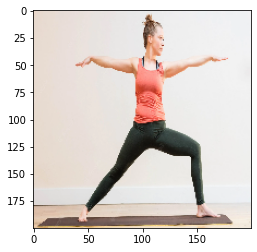

In [20]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():
 
  # prdiksi
  path = '/content/' + fn
  img = image.load_img(path, target_size=(200, 200))
  x = image.img_to_array(img)
  plt.imshow(x/255.)#scaling
  x = np.expand_dims(x, axis=0)
  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(classes[0]) 
  
  classes = classes[0].tolist()
  max_value = max(classes)
  max_index = classes.index(max_value)
  classes = ['Downdog','Goddess','Plank','Tree','Warrior2']
  print('hasil prediksi dari gambar yang diinput adalah', classes[max_index])